In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load the CSV data
df = pd.read_csv('All_Reviews.csv')

# Display the loaded data
df.head()

,Username,Review Date,Visit Date,Business,Review Title,Review Text,Rating
0,emilet2014,"August 7, 2022",August 2022,Clochard,"Delicious food, good service in great area of ...",Excellent restaurant with friendly and custome...,5.0
1,10MichaelP10,"March 29, 2023",March 2023,Clochard,A must try restaurant in Thessaloniki,Everything was excellent from the time we ente...,5.0
2,100User,"August 4, 2022",August 2022,Clochard,An amazing experience,"The restaurant was excellent, very good and fr...",5.0
3,Stefanos T,"March 12, 2023",March 2023,Clochard,"Great ambiance, but...","The ambience, staff and music were excellent. ...",3.0
4,Arthur C,"June 10, 2022",June 2022,Clochard,Good restaurant,"We had a good time there, however when we ment...",3.0


#Preprocessing
The text is preprocessed by converting it to lowercase, removing punctuation, stopwords, and performing stemming.

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download stopwords and WordNet corpus
nltk.download('stopwords')
nltk.download('wordnet')

# Define stopwords and initialize lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess the review text
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords and lemmatize the remaining words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join the words back into a single string
    preprocessed_text = ' '.join(words)

    return preprocessed_text

# Apply the preprocessing function to the Review Text column
df['Processed Review'] = df['Review Text'].apply(preprocess_text)

# Display the preprocessed reviews
df[['Review Text', 'Processed Review']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yiannisprokopiou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yiannisprokopiou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yiannisprokopiou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yiannisprokopiou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Review Text,Processed Review
0,Excellent restaurant with friendly and custome...,excellent restaurant friendly customer focusse...
1,Everything was excellent from the time we ente...,everything excellent time enter restaurant til...
2,"The restaurant was excellent, very good and fr...",restaurant excellent good friendly waiter food...
3,"The ambience, staff and music were excellent. ...",ambience staff music excellent however food av...
4,"We had a good time there, however when we ment...",good time however mentioned salmon way cooked ...


# 1. Visualize the number of monthly reviews over time
To visualize the number of monthly reviews over time, we need to extract the month and year from the "Review Date" column and count the reviews for each month.

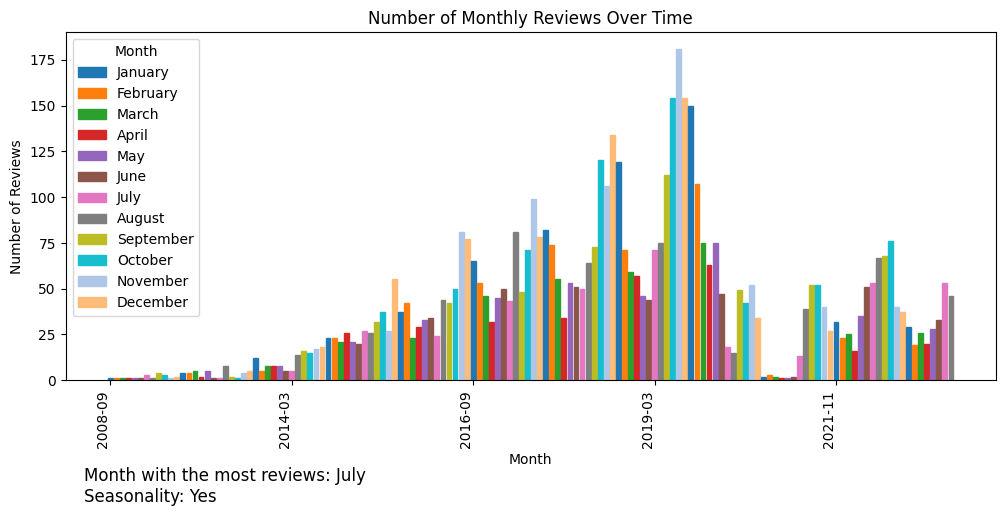

In [5]:
# 1. Visualize the number of monthly reviews over time

# Convert the Review Date column to datetime
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Extract month and year from the Review Date column
df['month'] = df['Review Date'].dt.to_period('M')

# Count the number of reviews for each month
monthly_reviews = df['month'].value_counts().sort_index()

# Generate a color palette with distinct and visually pleasing colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']

# Plot the number of monthly reviews with colored bars
plt.figure(figsize=(12, 6))
bars = plt.bar([str(month) for month in monthly_reviews.index], monthly_reviews.values)
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Number of Monthly Reviews Over Time')
plt.xticks(rotation=90, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))  # Adjust the number of x-axis ticks
plt.subplots_adjust(bottom=0.3)  # Adjust the bottom margin to create more space for x-axis labels

# Create a legend with month names and colors
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=colors[i], label=calendar.month_name[i+1]) for i in range(12)]
plt.legend(handles=legend_elements, title='Month')

# Customize the appearance of the bars
for i, bar in enumerate(bars):
    bar.set_color(colors[i % 12])

# Find the month with the most reviews
month_with_most_reviews = monthly_reviews.idxmax()

# Check for seasonality in the volume of reviews
seasonality = monthly_reviews.groupby(monthly_reviews.index.month).mean()

# Display seasonality and month with most reviews below the plot
plt.text(0.02, -0.35, f"Month with the most reviews: {calendar.month_name[month_with_most_reviews.month]}\n"
                      f"Seasonality: {'Yes' if seasonality.std() > 0 else 'No'}",
         transform=plt.gca().transAxes, fontsize=12)

plt.show()



# The top-10 rated and the bottom-10 rated locations
To determine the top-10 and bottom-10 rated locations, we can calculate the average rating for each restaurant and consider the number of ratings as well. We can then sort the restaurants based on these criteria.

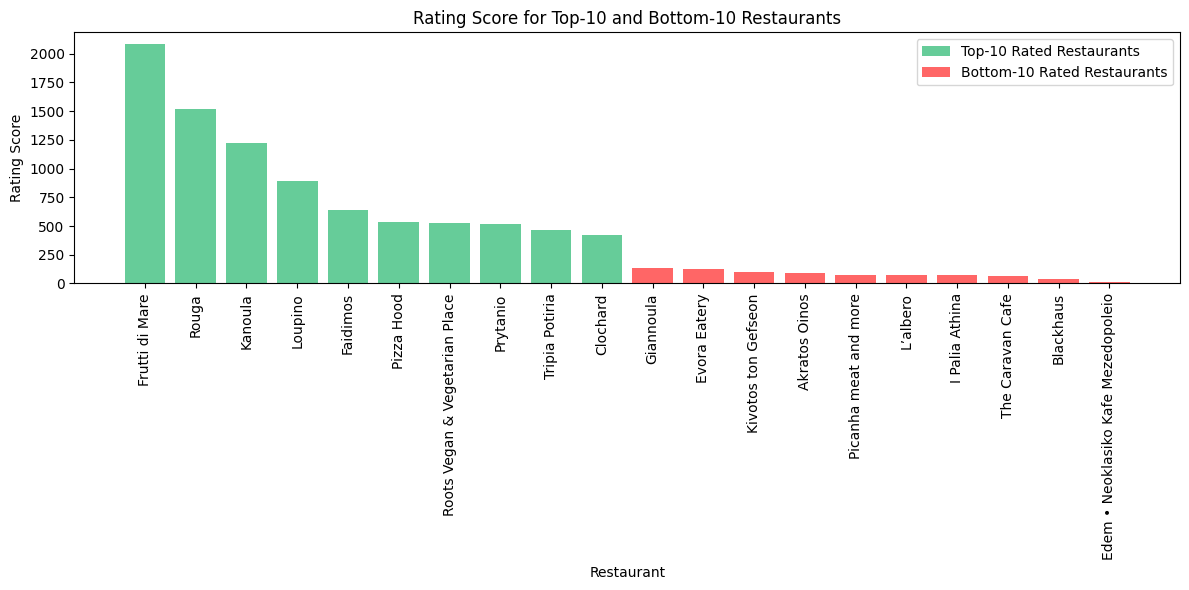

In [20]:
# Calculate validity score for each restaurant
validity_scores = {}
ratings_count = {}

for index, row in df.iterrows():
    restaurant_name = row['Business']
    rating = row['Rating']
    count = ratings_count.get(restaurant_name, 0) + 1
    ratings_count[restaurant_name] = count
    validity_scores[restaurant_name] = validity_scores.get(restaurant_name, 0) + (rating * count)

# Sort restaurants by validity score in descending order
sorted_restaurants = sorted(validity_scores.items(), key=lambda x: x[1], reverse=True)

# Get the top-10 and bottom-10 rated locations
top_10_restaurants = sorted_restaurants[:10]
bottom_10_restaurants = sorted_restaurants[-10:]

# Define custom colors for the bar chart
top_color = '#66cc99'  # Green
bottom_color = '#ff6666'  # Red

# Plot the change in ratings for the top-10 and bottom-10 restaurants
plt.figure(figsize=(12, 6))
plt.bar([r[0] for r in top_10_restaurants], [r[1] / ratings_count[r[0]] for r in top_10_restaurants], color=top_color)
plt.bar([r[0] for r in bottom_10_restaurants], [r[1] / ratings_count[r[0]] for r in bottom_10_restaurants], color=bottom_color)
plt.xlabel('Restaurant')
plt.ylabel('Rating Score')
plt.title('Rating Score for Top-10 and Bottom-10 Restaurants')
plt.xticks(rotation=90)
plt.legend(['Top-10 Rated Restaurants', 'Bottom-10 Rated Restaurants'])
plt.tight_layout()
plt.show()


# 3. Identify locations with the highest increase or decrease in rating over the years
To identify locations with the highest increase or decrease in rating over the years, we can calculate the yearly average rating for each restaurant and then calculate the percentage change compared to the previous year.

In [52]:
# Convert the Review Date column to datetime
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Extract the year from the Review Date column
df['year'] = df['Review Date'].dt.year

# Calculate the yearly average rating for each location
yearly_avg_rating = df.groupby(['Business', 'year'])['Rating'].mean().reset_index()
yearly_avg_rating = df.groupby(['Business', 'year']).agg({'Rating': ['mean', 'count']}).reset_index()
yearly_avg_rating.columns = ['Business', 'Year', 'Rating', 'Count']
yearly_avg_rating


,Business,year,Rating,rating_change
1,Akratos Oinos,2020,5.000000,11.111111
2,Akratos Oinos,2021,5.000000,0.000000
3,Akratos Oinos,2022,4.833333,-3.333333
4,Akratos Oinos,2023,4.333333,-10.344828
6,Argofageio,2017,4.000000,33.333333
...,...,...,...,...
271,Vary Peponi (Heavy Melon),2019,4.642857,-5.423280
272,Vary Peponi (Heavy Melon),2020,4.857143,4.615385
273,Vary Peponi (Heavy Melon),2021,5.000000,2.941176
274,Vary Peponi (Heavy Melon),2022,4.733333,-5.333333


/var/folders/2v/qy72_8_x4rlf7p8462tnd8lc0000gn/T/ipykernel_7774/2180415268.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlBu')  # Diverging color scheme


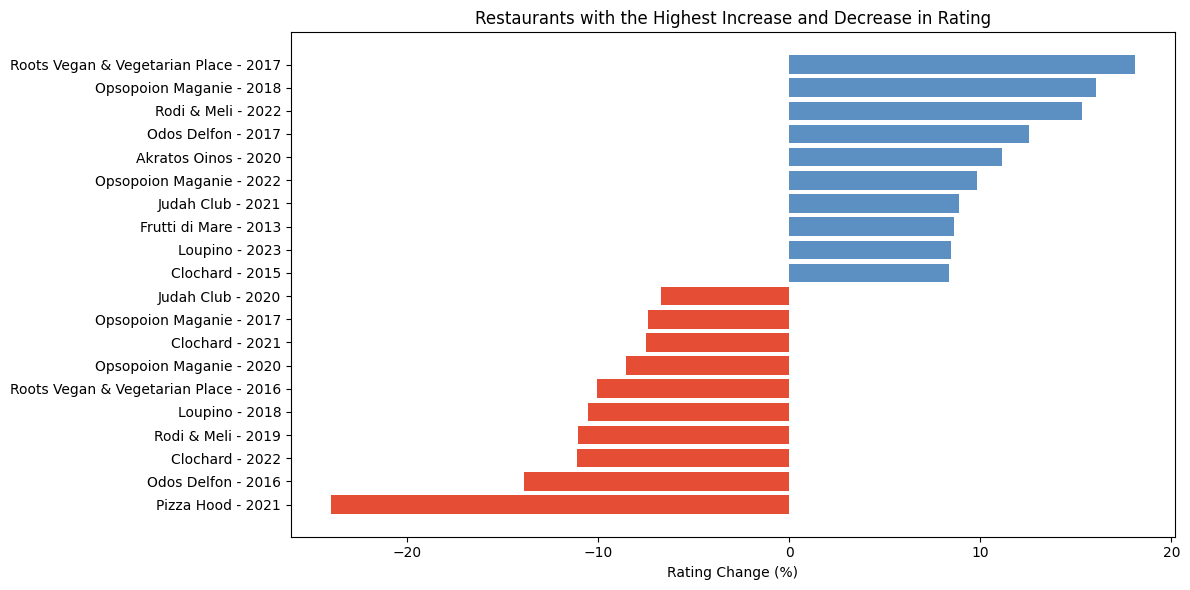

In [59]:
# Convert the Review Date column to datetime
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Extract the year from the Review Date column
df['year'] = df['Review Date'].dt.year

# Calculate the yearly average rating and ratings count for each location
yearly_avg_rating = df.groupby(['Business', 'year']).agg({'Rating': ['mean', 'count']}).reset_index()
yearly_avg_rating.columns = ['Business', 'Year', 'Rating', 'Count']

# Keep resturants where there were at least 5 reviews in a year
yearly_avg_rating = yearly_avg_rating[yearly_avg_rating['Count'] >= 5]

# Calculate the percentage change in rating compared to the previous year
yearly_avg_rating['rating_change'] = yearly_avg_rating.groupby('Business')['Rating'].pct_change() * 100

# Filter out the first year for each location since there is no previous year to compare
yearly_avg_rating = yearly_avg_rating.dropna(subset=['rating_change'])

# Get the top locations with the highest increase and decrease in rating
top_increase_locations = yearly_avg_rating.nlargest(10, 'rating_change')
top_decrease_locations = yearly_avg_rating.nsmallest(10, 'rating_change')

# Concatenate the data for plotting
plot_data = pd.concat([top_decrease_locations, top_increase_locations], ignore_index=True)

# Add new column with Business name and year of the rating change
plot_data['Business_Year'] = plot_data['Business'] + ' - ' + plot_data['Year'].astype(str)

# Sort the data by rating_change
plot_data = plot_data.sort_values('rating_change',ascending=False)

# Define the color scheme
cmap = plt.cm.get_cmap('RdYlBu')  # Diverging color scheme
colors = [cmap(0.85)] * len(top_decrease_locations) + [cmap(0.15)] * len(top_increase_locations)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(plot_data['Business_Year'], plot_data['rating_change'], color=colors)
ax.set_xlabel('Rating Change (%)')
ax.set_title('Restaurants with the Highest Increase and Decrease in Rating')
ax.invert_yaxis()  # Invert y-axis to display restaurants from top to bottom

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


# 4.Visualization of Word Clouds for Common Words in Reviews
  The word cloud displays the words with their frequency, giving an intuitive representation of the prominent terms in the reviews. Separate word clouds are created for 5-star and 1-star reviews, allowing for a comparison of the most common words in positive and negative reviews.

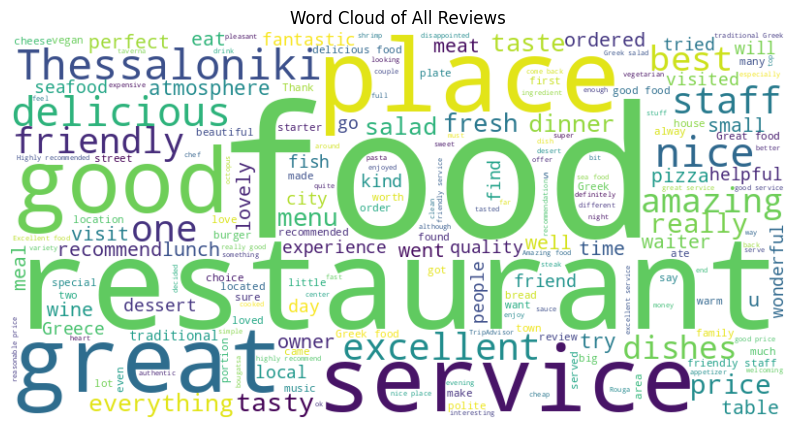

In [13]:
from wordcloud import WordCloud

# Concatenate all review texts into a single string
all_reviews_text = ' '.join(df['Review Text'].astype(str))

# Create a word cloud of all reviews
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Plot the word cloud of all reviews
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Reviews')
plt.show()


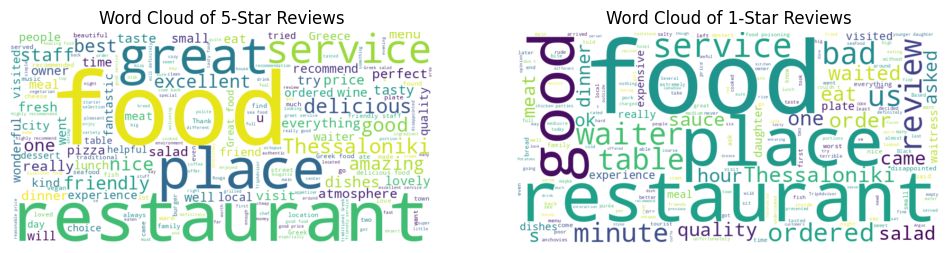

In [14]:
# Filter 5-star reviews
five_star_reviews = df[df['Rating'] == 5]
five_star_text = ' '.join(five_star_reviews['Review Text'].astype(str))

# Create a word cloud of 5-star reviews
wordcloud_five_star = WordCloud(width=800, height=400, background_color='white').generate(five_star_text)

# Filter 1-star reviews
one_star_reviews = df[df['Rating'] == 1]
one_star_text = ' '.join(one_star_reviews['Review Text'].astype(str))

# Create a word cloud of 1-star reviews
wordcloud_one_star = WordCloud(width=800, height=400, background_color='white').generate(one_star_text)

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(wordcloud_five_star, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud of 5-Star Reviews')

axes[1].imshow(wordcloud_one_star, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud of 1-Star Reviews')

plt.show()

#5.Top 10 Fastest Growing and Shrinking Words in TripAdvisor Reviews
The code snippet analyzes TripAdvisor reviews to identify the 10 words that have experienced the most significant growth in usage frequency over time, as well as the 10 words that have declined the most in usage frequency.

By tracking word frequencies and growth/shrinkage rates, the code helps uncover the dynamic nature of language in TripAdvisor reviews, highlighting the evolving trends and popular topics among users.

The generated line charts provide a visual representation of the growth and decline patterns of these words, allowing users to easily identify the fastest-growing and shrinking words and gain insights into the changing preferences and sentiments expressed in the reviews

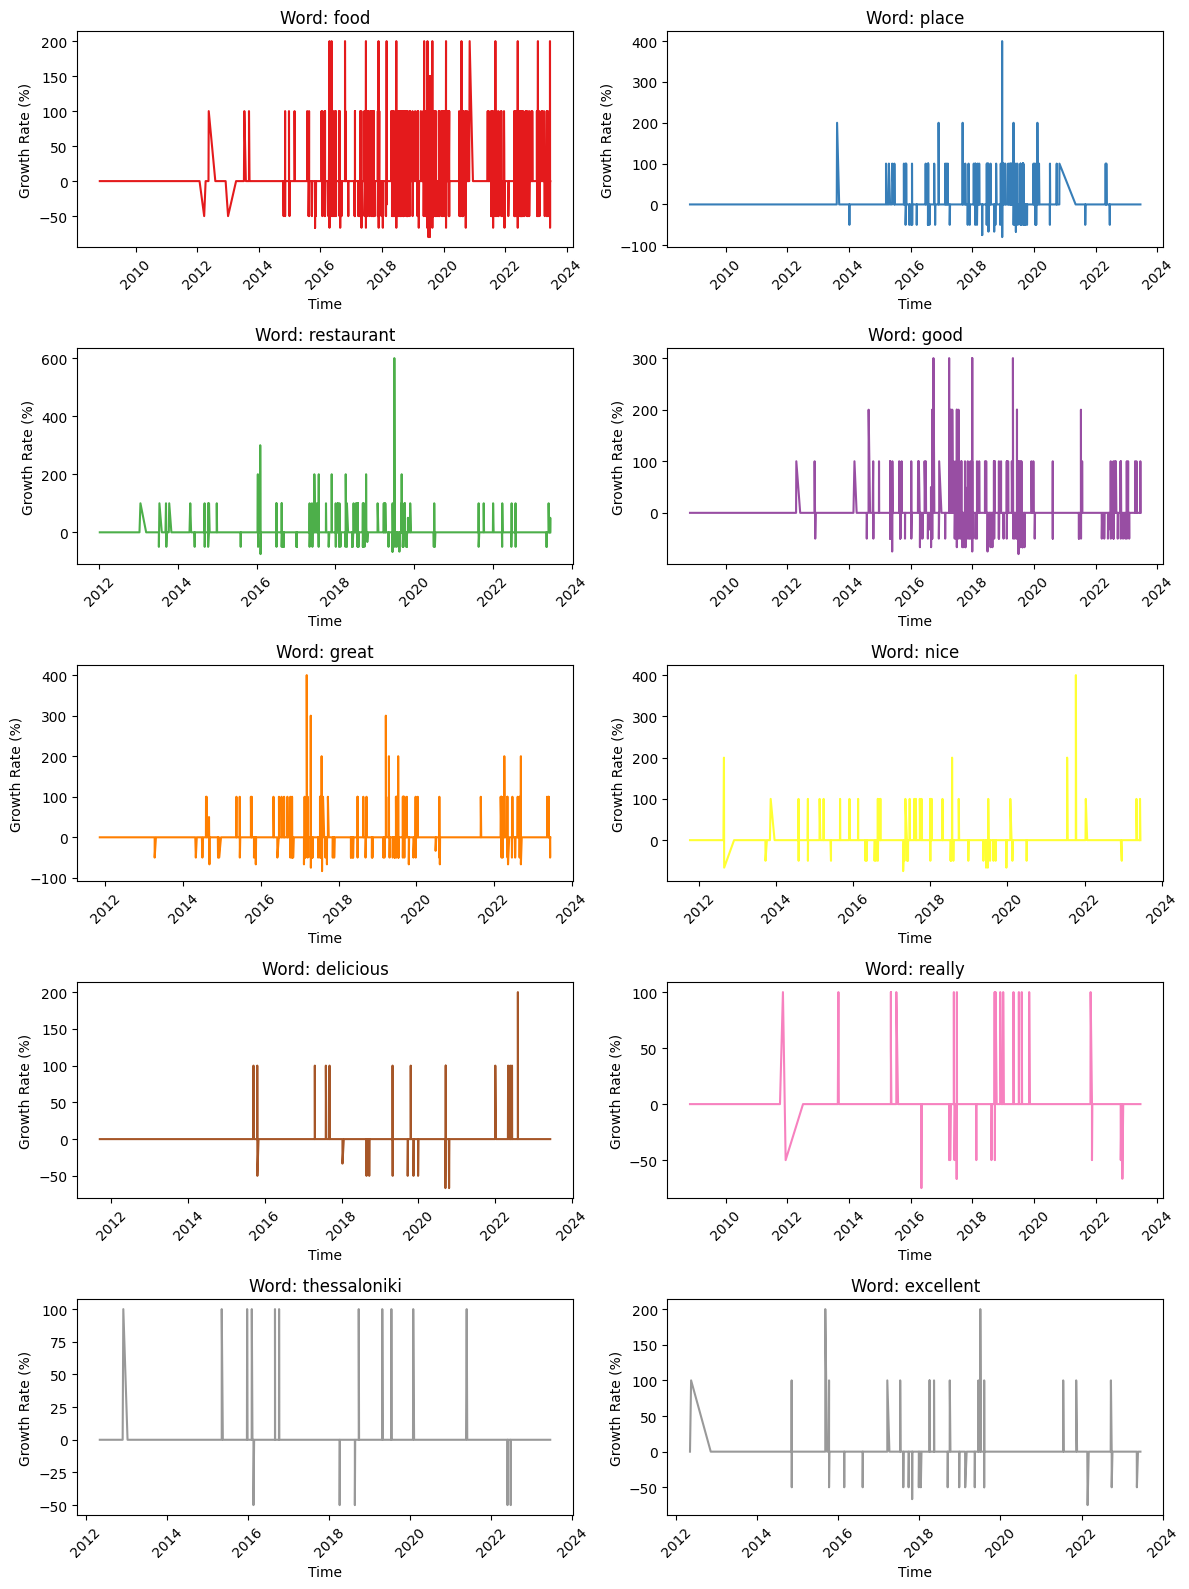

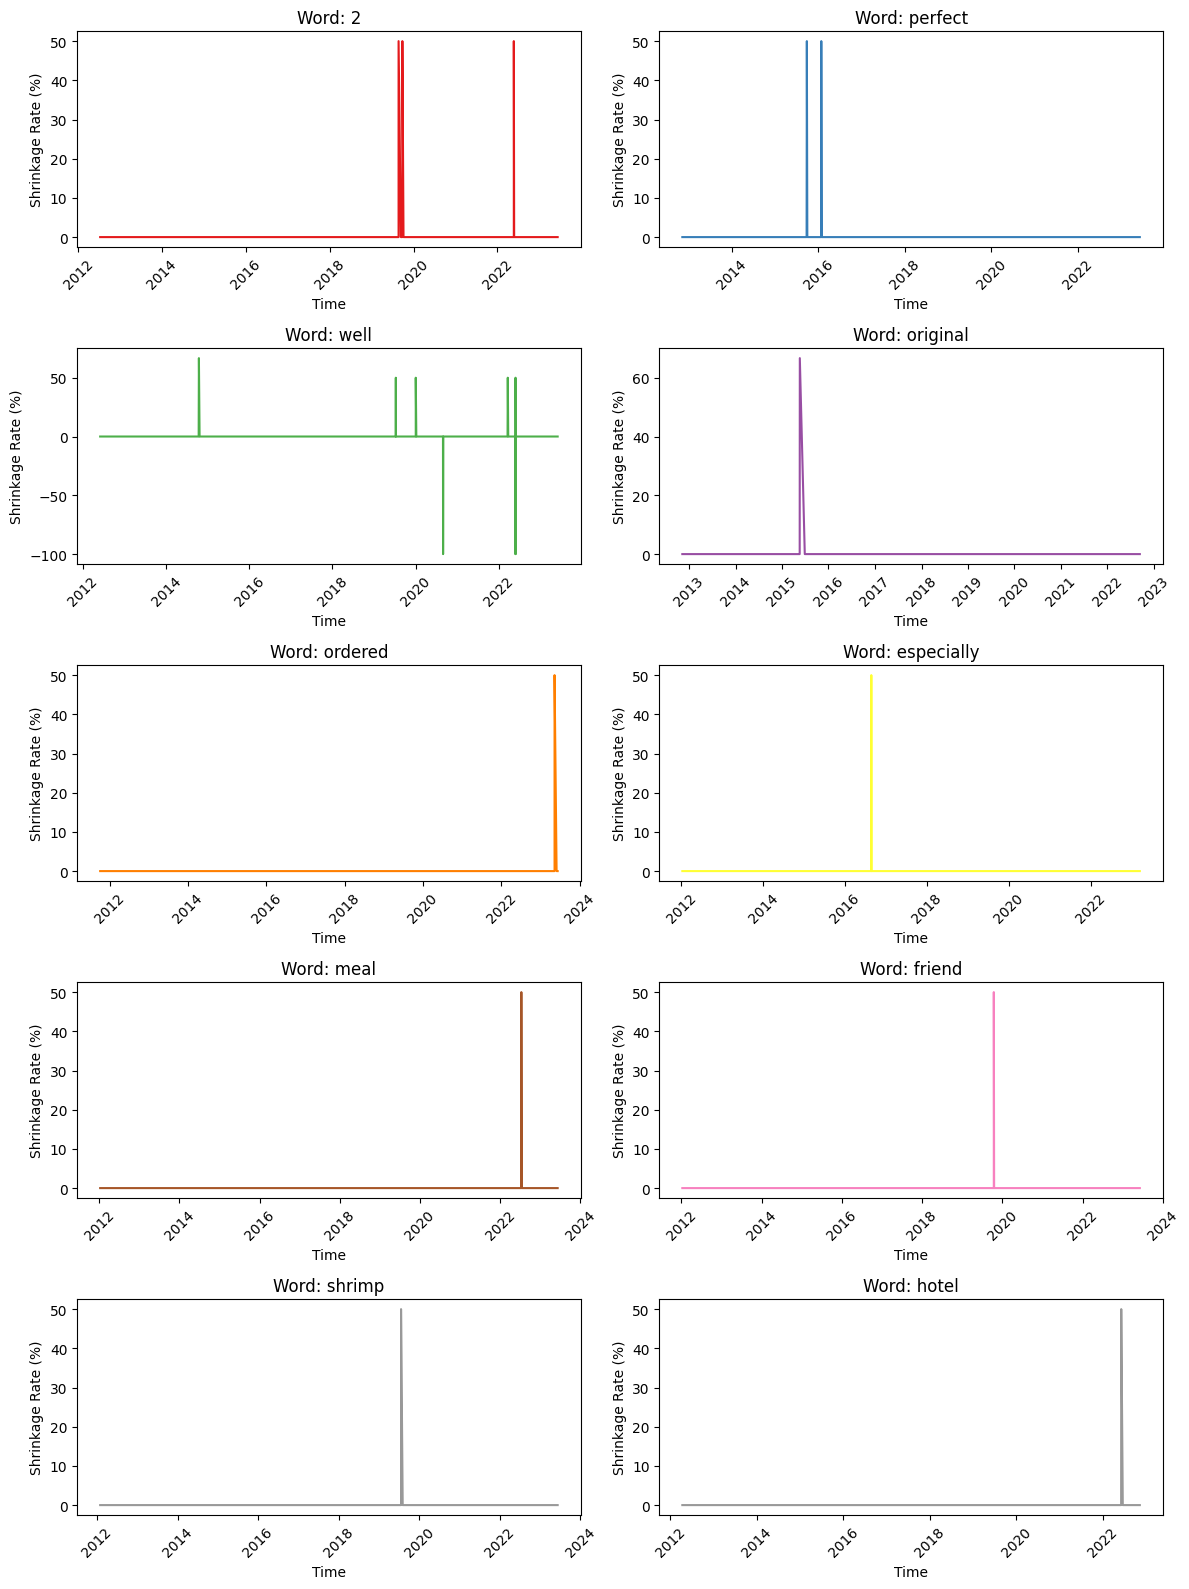

In [71]:
from collections import defaultdict
# Sort the DataFrame by date
df.sort_values('Review Date', inplace=True)

# Initialize dictionaries to store word frequencies
word_counts_previous = defaultdict(int)
word_counts_current = defaultdict(int)
word_growth_rates = defaultdict(list)
word_shrinkage_rates = defaultdict(list)

previous_date = None
# Iterate over the reviews to calculate word frequencies and growth/shrinkage rates
for index, row in df.iterrows():
    words = row['Processed Review']
    current_date = row['Review Date']

    if previous_date is None:
        previous_date = current_date
        continue

    # Calculate word frequencies for the current review
    word_counts_current = defaultdict(int)
    for word in words.split():
        word_counts_current[word] += 1

    # Calculate growth/shrinkage rates compared to the previous time period
    for word, count_current in word_counts_current.items():
        count_previous = word_counts_previous[word]
        growth_rate = (count_current - count_previous) / count_previous * 100 if count_previous > 0 else 0
        shrinkage_rate = (count_previous - count_current) / count_previous * 100 if count_previous > 0 else 0

        word_growth_rates[word].append((current_date, growth_rate))
        word_shrinkage_rates[word].append((current_date, shrinkage_rate))

    # Update the previous word frequencies and date for the next iteration
    word_counts_previous = word_counts_current.copy()
    previous_date = current_date

# Sort words based on their growth rates and select the top 10 growing and shrinking words
top_growing_words = sorted(word_growth_rates.items(), key=lambda x: sum(y for _, y in x[1]), reverse=True)[:10]
top_shrinking_words = sorted(word_shrinkage_rates.items(), key=lambda x: sum(y for _, y in x[1]), reverse=True)[:10]

# Generate line charts for the fastest growing words
plt.figure(figsize=(12, 16))
colors = plt.cm.Set1(range(10))
for i, (word, growth_rates) in enumerate(top_growing_words):
    plt.subplot(5, 2, i+1)
    x, y = zip(*growth_rates)
    plt.plot(x, y, color=colors[i])
    plt.title(f"Word: {word}")
    plt.xlabel("Time")
    plt.ylabel("Growth Rate (%)")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("fastest_growing_words.png")  # Save the image

# Generate line charts for the fastest shrinking words
plt.figure(figsize=(12, 16))
colors = plt.cm.Set1(range(10))
for i, (word, shrinkage_rates) in enumerate(top_shrinking_words):
    plt.subplot(5, 2, i+1)
    x, y = zip(*shrinkage_rates)
    plt.plot(x, y, color=colors[i])
    plt.title(f"Word: {word}")
    plt.xlabel("Time")
    plt.ylabel("Shrinkage Rate (%)")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("fastest_shrinking_words.png")  # Save the image

#6.Exploring Emerging Topics in User Reviews: A Visual Analysis
The code utilizes the gensim library to build an LDA (Latent Dirichlet Allocation) model, which is a popular technique for topic modeling. The model is trained on a list of preprocessed reviews, where each review is converted into a bag-of-words representation.
The LDA model is then used to identify the most prominent topics in the user reviews. These topics represent recurring themes or subjects that are discussed across the reviews. The code prints the identified topics along with their corresponding keywords.
The pyLDAvis library is employed to create an interactive visualization that allows users to explore and interpret the emerging topics. The visualization provides an intuitive interface to analyze the topics, their keyword distributions, and their relationships, enabling a deeper understanding of the main themes present in the user reviews.

In [17]:
import gensim

# Create a list of preprocessed reviews
preprocessed_reviews = df['Processed Review'].tolist()

# Convert each preprocessed review into a list of tokens
tokenized_reviews = [review.split() for review in preprocessed_reviews]

# Create a dictionary representation of the reviews
id2word = gensim.corpora.Dictionary(tokenized_reviews)

# Create a bag-of-words corpus
corpus = [id2word.doc2bow(tokens) for tokens in tokenized_reviews]

# Define the number of topics
num_topics = 10

# Build the LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# Print the topics
topics = lda_model.print_topics()
for topic in topics:
    print(topic)


(0, '0.029*"place" + 0.025*"great" + 0.020*"service" + 0.019*"nice" + 0.018*"food" + 0.014*"restaurant" + 0.013*"friendly" + 0.012*"delicious" + 0.010*"staff" + 0.010*"excellent"')
(1, '0.032*"food" + 0.017*"restaurant" + 0.017*"great" + 0.012*"good" + 0.009*"service" + 0.009*"place" + 0.009*"greek" + 0.008*"friendly" + 0.008*"really" + 0.007*"dish"')
(2, '0.022*"food" + 0.013*"best" + 0.012*"good" + 0.011*"place" + 0.010*"dish" + 0.010*"staff" + 0.009*"delicious" + 0.009*"thessaloniki" + 0.008*"one" + 0.008*"friendly"')
(3, '0.042*"food" + 0.027*"good" + 0.017*"place" + 0.015*"service" + 0.013*"restaurant" + 0.013*"delicious" + 0.013*"excellent" + 0.012*"friendly" + 0.011*"nice" + 0.009*"great"')
(4, '0.036*"food" + 0.015*"restaurant" + 0.014*"place" + 0.013*"delicious" + 0.013*"great" + 0.012*"greek" + 0.011*"best" + 0.010*"amazing" + 0.010*"price" + 0.009*"one"')
(5, '0.020*"food" + 0.016*"service" + 0.015*"restaurant" + 0.015*"great" + 0.013*"good" + 0.012*"nice" + 0.011*"tasty" + 

In [18]:
import pyLDAvis.gensim

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)